In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_dataset.csv")


In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)


In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.7207792207792207


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.7467532467532467


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.7207792207792207


In [ ]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

svm_pred = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.7467532467532467


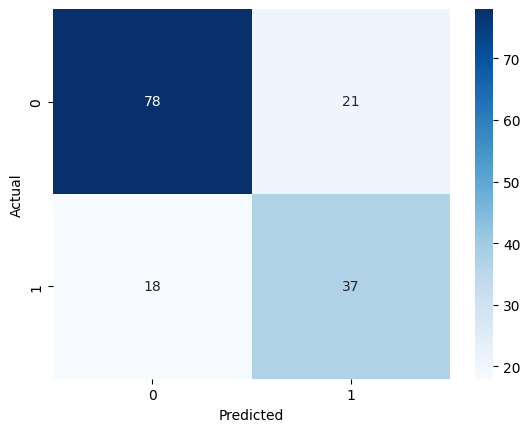

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
# Get probabilities for positive class (diabetes = 1)
rf_probs = rf.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# AUC score
roc_auc = auc(fpr, tpr)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8339761248852158


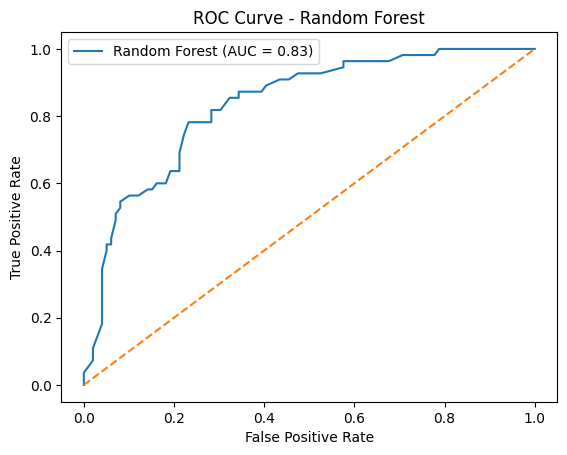

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [ ]:
importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
1,Glucose,0.263453
5,BMI,0.164118
7,Age,0.134927
6,DiabetesPedigreeFunction,0.121819
4,Insulin,0.089248
2,BloodPressure,0.084062
3,SkinThickness,0.072432
0,Pregnancies,0.069942


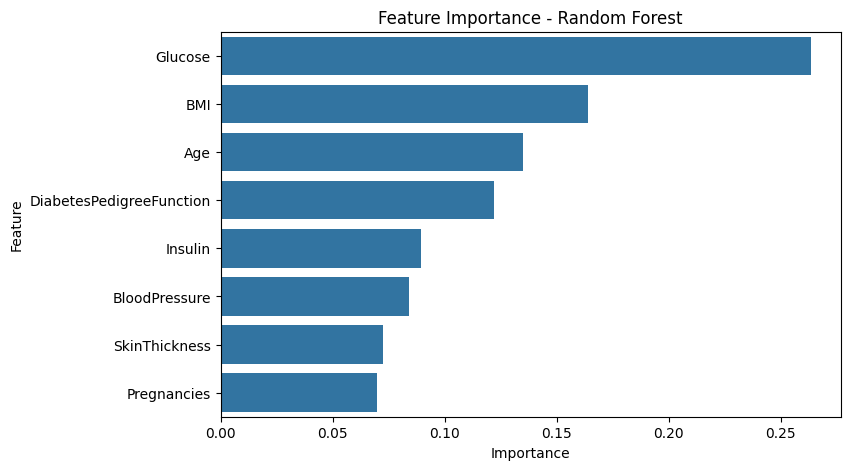

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df
)
plt.title("Feature Importance - Random Forest")
plt.show()


## Explainable AI using SHAP


In [ ]:
!pip install shap


In [ ]:
import shap

In [ ]:
shap.initjs()


In [ ]:
explainer = shap.TreeExplainer(rf)


In [ ]:
shap_values = explainer.shap_values(X_test)


In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
type(shap_values)


numpy.ndarray

In [ ]:
import numpy as np

if isinstance(shap_values, list):
    print("SHAP returned a list")
    print(np.array(shap_values).shape)
else:
    print("SHAP returned an array")
    print(shap_values.shape)


SHAP returned an array
(154, 8, 2)


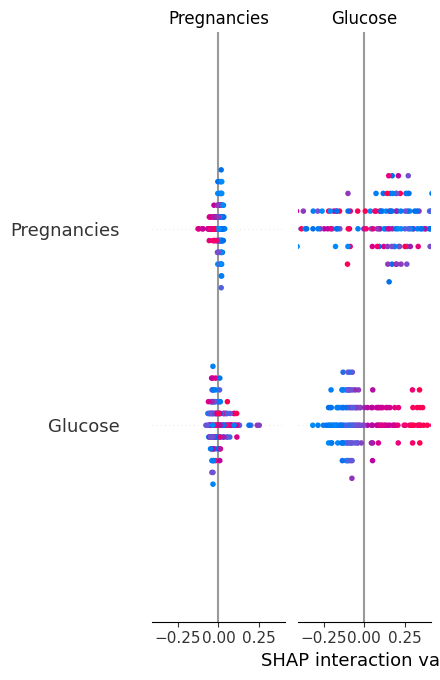

In [ ]:
shap.summary_plot(shap_values, X_test)


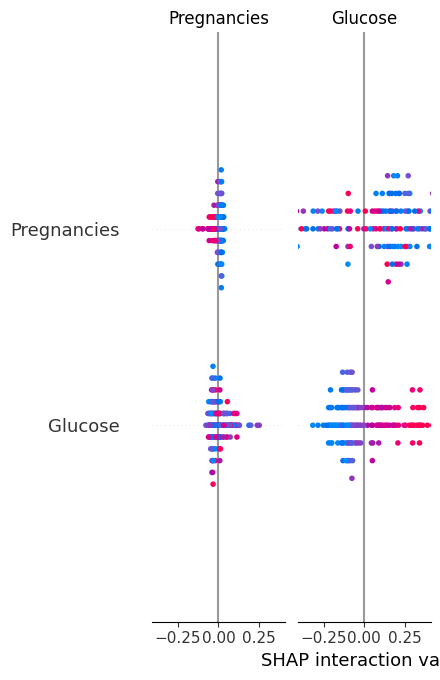

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
patient_index = 0


In [ ]:
import numpy as np
np.array(shap_values).shape


(154, 8, 2)

In [ ]:
exp = shap.Explanation(
    values=shap_values[patient_index][:, 1],
    base_values=explainer.expected_value[1],
    data=X_test.iloc[patient_index],
    feature_names=X_test.columns
)


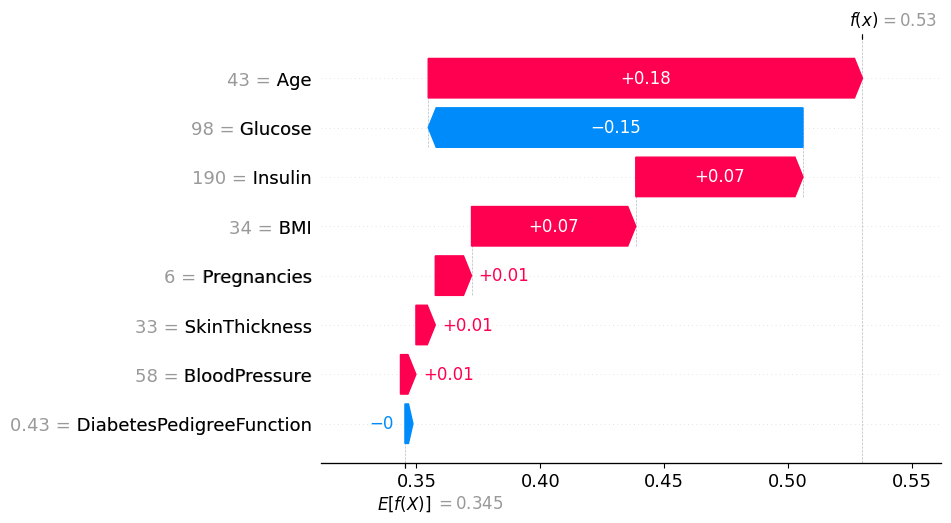

In [ ]:
shap.plots.waterfall(exp)
